<a href="https://colab.research.google.com/github/yashshroff99/College-Projects/blob/main/nnfl_project_3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip  "/content/drive/My Drive/GROUP_25.zip"


Archive:  /content/drive/My Drive/GROUP_25.zip
  inflating: GROUP_25/Final Report - NNFL.docx.pdf  
  inflating: GROUP_25/Final_weights_motival.hdf5  
  inflating: GROUP_25/Final_weights_off.hdf5  
  inflating: GROUP_25/nnfl_project_3_submission.ipynb  
  inflating: GROUP_25/weights_pos_neg.hdf5  


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-11-29 12:17:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-11-29 12:17:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-11-29 12:17:11--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove.6B.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
from keras.layers import  Flatten, Dense, Dropout


Using TensorFlow backend.


In [ ]:
train=pd.read_csv("/content/drive/My Drive/NNFL Fall'19 Project/data_7000_new.csv",header=None)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import cv2

import pandas as pd

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
import os
images={}
i=0
# print(train[0][100])
# a=[]
not_aval=[]
for file in train[0]:
  a=cv2.imread(os.path.join("/content/drive/My Drive/NNFL Fall'19 Project/data_7000/", file))
  print(i)
  if a is not None:
    images[i] = cv2.resize(a,(240,240))
    # print(a)
    i+=1
  else:
    print(file,i)
    i+=1
    not_aval.append(i-1)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
print(train[0][not_aval])
trainFinal=train.drop(not_aval,axis=0)

1443    giorgio_ancient-aliens-guy-memes-giorgio-a-tso...
4673                                     seal_oqx0m9t.jpg
4865                                   got_GOT-Meme-9.png
5983         giorgio_889e6c9e8f8368ee8d60779964ae9571.jpg
Name: 0, dtype: object


In [ ]:
trainFinal.shape

(6597, 9)

In [ ]:
x_text=trainFinal[3]
x_text.shape


(6597,)

In [ ]:
y3=trainFinal[6]
y4=trainFinal[7]
y5=trainFinal[8]


In [ ]:
y4f= y4.replace({"motivational":+1, "not_motivational":0,'negative':None,'neutral':None,'positive':None,'very_negative':None,'very_positive':None})
a4f={}
for i in y4f:
  if i in a4f.keys():
    a4f[i]+=1
  else:

    a4f[i]=1

In [ ]:

x_text=x_text.astype(str)


In [ ]:
import numpy as np
import pandas as pd
import os

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Dense, Embedding, LSTM, Input
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
word_index=[]
num_words = 12880
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ')
tokenizer.fit_on_texts(x_text.values)
X = tokenizer.texts_to_sequences(x_text.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

max_length_of_text = 50
X = pad_sequences(X, maxlen=max_length_of_text)

print(word_index)


Found 12880 unique tokens.
{'the': 1, 'you': 2, 'a': 3, 'i': 4, 'to': 5, 'com': 6, 'and': 7, 'is': 8, 'of': 9, 'in': 10, 'when': 11, 'my': 12, 'me': 13, 'your': 14, 'that': 15, 'for': 16, 'it': 17, 'this': 18, 'on': 19, 'like': 20, 'be': 21, 'memes': 22, 'are': 23, 'not': 24, 'with': 25, 'imgflip': 26, 'have': 27, 'what': 28, 'bill': 29, 'but': 30, "i'm": 31, 'if': 32, 'at': 33, "don't": 34, 'just': 35, 'he': 36, 'we': 37, 'was': 38, 'meme': 39, 'so': 40, 'do': 41, 'no': 42, 'one': 43, 'all': 44, 'they': 45, 'quickmeme': 46, 'how': 47, 'his': 48, 'net': 49, 'about': 50, 'who': 51, 'can': 52, 'memecenter': 53, 'know': 54, "it's": 55, "you're": 56, 'will': 57, 'an': 58, 'get': 59, 'up': 60, 'out': 61, 'people': 62, 'make': 63, 'by': 64, 'as': 65, 'memegenerator': 66, 'from': 67, 'because': 68, 'time': 69, 'now': 70, 'see': 71, 'why': 72, 'funny': 73, 'has': 74, 'only': 75, 'more': 76, 'her': 77, 'never': 78, 'think': 79, 'him': 80, 'got': 81, 'love': 82, 'look': 83, 'friends': 84, 'want'

In [ ]:
import numpy as np
embeddings_index = {}
f = open( 'glove.6B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, 200))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
moti_Text=X[y4f.notnull()]
moti_images=pd.Series(images)[y4f.notnull()]
y4f=y4f[y4f.notnull()]


In [ ]:
import numpy as np
import pandas as pd
import os

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Dense, Embedding, LSTM, Input
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [ ]:
y4final=y4f
moti_train_text,moti_test_text,moti_train_image,moti_test_image, y_moti_train, y_moti_test = train_test_split(moti_Text,moti_images,y4final,test_size = 0.1)


In [ ]:
import keras
from keras.layers import BatchNormalization as BatchNorm



import keras
from keras.layers import Convolution1D as Conv1D
from  keras.layers import MaxPooling1D as MaxPooling1D
embed_dim = 200 #Change to observe effects
lstm_out = 512 #Change to observe effects
batch_size = 32


input1 = keras.layers.Input(shape=(240,240,3,),name="image_input")
input2 = keras.layers.Input(shape=(50,),name="text_input")

iml=Conv2D(64, (3, 3), activation='relu',name="Conv2D_1")(input1)
iml=MaxPool2D(pool_size=(2, 2),name='MaxPool2D_1')(iml)
iml=Conv2D(64, (3, 3), activation='relu',name="Conv2d_2")(iml)
iml=MaxPool2D(pool_size=(2, 2),name="MaxPool2D_2")(iml)

iml=Conv2D(128, (3,3), activation='relu',name="Conv2D_3")(iml)
iml=MaxPool2D(pool_size=(2, 2),name="MaxPool2D_3")(iml)

iml = Flatten(name="Flatten_images")(iml)

x = Embedding(12881, embed_dim,weights=[embedding_matrix],name="Embedding_layer")(input2)
x = Conv1D(512, 5, activation='relu', kernel_initializer='normal',name="Conv1D_1")(x)
x = Conv1D(256, 5, activation='relu', kernel_initializer='normal',name="Conv1D_2")(x)
x = MaxPooling1D(5,name="MaxPooling1D_text")(x)
x = Flatten(name="Flatten_text")(x)
added=keras.layers.Concatenate(axis=-1)([x,iml])
x=Dropout(rate=0.9,name="Dropout_1")(x)
x= Dense(128,activation='relu', kernel_initializer='normal',name="Dense_1")(added)
preds = Dense(1, activation='sigmoid', kernel_initializer='normal',name="Dense_2")(x)

model = Model(inputs=[input1, input2], outputs=preds)















Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        (None, 240, 240, 3)  0                                            
__________________________________________________________________________________________________
Conv2D_1 (Conv2D)               (None, 238, 238, 64) 1792        image_input[0][0]                
__________________________________________________________________________________________________
text_input (InputLayer)         (None, 50)           0                                            
__________________________________________________________________________________________________
MaxPool2D_1 (MaxPooling2D)      (None, 119, 119, 64) 0           Conv2D_1[0][0]                   
____________________________________________________________________________________________

In [ ]:

from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer='sgd', metrics = ['mae','accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:

moti_train_image=np.array(moti_train_image.tolist())
moti_test_image=np.array(moti_test_image.tolist())
moti_train_image=np.true_divide(moti_train_image,255)
moti_test_image=np.true_divide(moti_test_image,255)



In [ ]:
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
class Metrics(Callback):

  def __init__(self, valid_data, *args, **kwargs):
    self.valid_data = valid_data

    super(Metrics, self).__init__(*args, **kwargs)

  def on_train_begin(self, logs={}):
    pass

  def on_epoch_end(self, epoch, logs={}):
    global temp
    val_predict =self.model.predict(self.valid_data[0])
    val_targ =self.valid_data[1]

    _val_f1 = f1_score(val_targ, np.round(val_predict), average = 'macro')
    print(" — val_macro_f1: {}".format(_val_f1))
    return

metricA= Metrics(([moti_test_image,moti_test_text],y_moti_test))

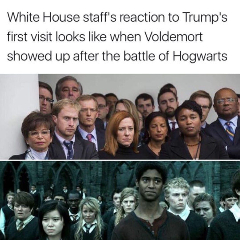

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow( np.multiply(moti_train_image[0],255));


In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="weights-improvement.hdf5"


# checkpoint = ModelCheckpoint(filepath, monitor='val_f1_m', verbose=1, save_best_only=True, mode='max')
callbacks_list = [metricA]
model.fit(x=[moti_train_image,moti_train_text], y=y_moti_train, batch_size=32, epochs=50,callbacks=callbacks_list, verbose=1,validation_data=([moti_test_image,moti_test_text],y_moti_test))

In [ ]:
model.load_weights("/content/GROUP_25/Final_weights_motival.hdf5")
test=pd.read_csv("/content/drive/My Drive/Test_nnfl_project/data1_test.csv")


In [ ]:
test.head()

,Image_name,Image_URL,OCR_extracted_text,corrected_text
0,skeptical_stealing-my-milk.jpg,http://www.relatably.com/m/img/funny-skeptical...,ISAW DAD WITH MOM LASTNIGHT I THINK HE WAS STE...,NaN
1,skeptical_breathing+if+she+has+my+nose.jpg,http://1.bp.blogspot.com/-g0E1yGCghCI/T68yJ1Oj...,HOW AM I STILL BREATHING IF SHE HAS MY NOSE? q...,HOW AM I STILL BREATHING IF SHE HAS MY NOSE? q...
2,skeptical_603b3553d88441537f6c65abac8a1cec.jpg,https://i.pinimg.com/736x/60/3b/35/603b3553d88...,YOU MEAN TO TELL ME BIGG BOSSIS BETTER THAN KB...,NaN
3,skeptical_e17ae5f069b21df5599460939047d4ae8db9...,http://www.quickmeme.com/img/e1/e17ae5f069b21d...,MY SHARE OF THE NATIONAL DEBT IS HOW MUCHP qui...,MY SHARE OF THE NATIONAL DEBT IS HOW MUCH?quic...
4,skeptical_75c34fa1-4d2b-45c1-9bda-5ff0f15d241e...,http://cdn.funnyisms.com/75c34fa1-4d2b-45c1-9b...,WAIT A SECOND BILLA AM I SKEPTICAL BABY GROWN ...,WAIT A SECOND BILLA AM I SKEPTICAL BABY GROWN ...


In [ ]:
timg=[]
i=0
# print(train[0][100])
# a=[]
not_aval=[]
for file in test['Image_name']:
  a=cv2.imread(os.path.join("/content/drive/My Drive/Test_nnfl_project/Meme_images/", file))
  print(i)
  if a is not None:
    timg.append(cv2.resize(a,(240,240)))
    # print(a)
    i+=1
  else:
    print(file,i)
    i+=1
    not_aval.append(i-1)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
timg=np.array(timg)
timg=np.true_divide(timg,255)

In [ ]:

X_text=tokenizer.texts_to_sequences(test['OCR_extracted_text'].astype(str).values)
print(X_text)
testing_input = pad_sequences(X_text, maxlen=50)
testing_input=np.array(testing_input)
testing_input.shape

[[5075, 352, 25, 279, 10519, 4, 79, 36, 38, 1668, 12, 993, 46, 6], [47, 106, 4, 123, 2878, 32, 90, 74, 12, 802, 6], [2, 202, 5, 138, 13, 10779, 10780, 141, 137, 10781, 1, 737, 551], [12, 451, 9, 1, 1809, 3350, 8, 47, 46, 6], [298, 3, 761, 9450, 106, 4, 793, 246, 4555, 60, 3416, 6, 292], [621, 3, 2513, 101, 416, 16, 104, 245, 66, 49], [2, 202, 5, 138, 13, 2219, 34, 197, 842, 20, 3566, 1869], [2, 219, 14, 28, 10, 77, 28, 26, 6], [2, 79, 31, 186, 296, 11678, 94, 19, 321, 793, 246, 39, 19, 321], [31, 158, 35, 269, 13], [334, 47, 1435, 400, 90, 20, 2, 14, 3, 1328, 63, 14, 39, 33, 241, 4840, 6, 4841, 557, 2660, 469, 61, 4842, 557, 2660, 793, 246, 39], [2, 202, 15, 43, 95, 4, 57, 27, 5, 166, 532, 5, 160, 3, 169, 348, 238], [194, 33, 13, 535], [2, 467, 1825, 13, 12, 3227, 38, 20, 18, 12304, 2215, 10], [2, 7, 414, 239, 4812, 1586, 16, 6497, 16, 148, 7, 359, 374, 2, 237, 17, 16, 99, 5778, 25, 1, 12647, 2233, 45, 92, 865, 8, 793, 246, 39, 26], [72, 23, 2, 9456, 61, 31, 1, 43, 325, 9457, 3, 1148, 

(914,)

In [ ]:
predictions=model.predict([timg,np.array(testing_input)])
import csv
predictions=predictions.reshape(-1)
predictions=np.round(predictions)
print(np.max(predictions))

sub=open("sub3.csv","w")
writer=csv.writer(sub)
writer.writerow(["ID","Motivational"])
for i in range(len(predictions)):
    writer.writerow([i,int(predictions[i])])
sub.close()

1.0


In [ ]:
y_predicted=model.predict([moti_test_image,moti_test_text])
y_predicted=y_predicted.reshape(-1)

In [ ]:
ans=[]
for i in y_predicted:
  if i>=.5:
    ans.append(1)
  else:
    ans.append(0)
print(ans)

[1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 

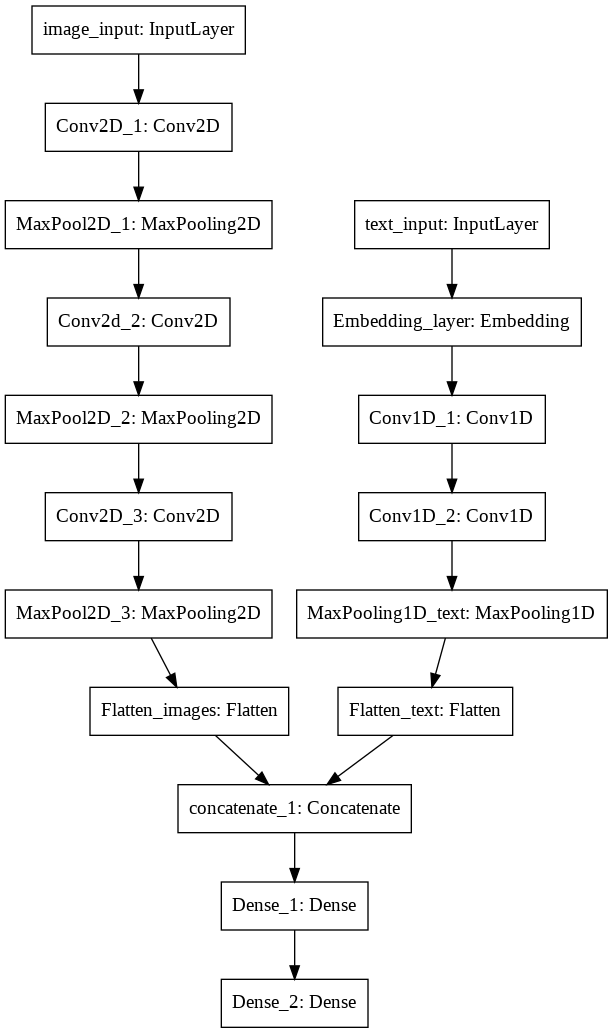

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
y5f= y5.replace({'negative': 1,'neutral': 2,'positive': 3,'positivechandler_Friday-Mood-AF.-meme-Friends-ChandlerBing.jpg':3,'very_negative': 0,'very_positive': 4})
a5f={}
for i in y5f:
  if i in a5f.keys():
    a5f[i]+=1
  else:
    a5f[i]=1
print(a5f)

y3f= y3.replace({'hateful_offensive': 3,'very_offensive': 2,'slight': 1,'not_offensive': 0,'very_positive':None,'motivational': None,'not_motivational':None,'positive':None})
y3fmean=y3f.mean()
# y3f=y3f.fillna(y3fmean)
a3f={}
for i in y3f:
  if i in a3f.keys():
    a3f[i]+=1
  else:
    a3f[i]=1
print(a3f)

{4.0: 957, 3.0: 2910, 2.0: 2073, 1.0: 439, 0.0: 138, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1}
{0.0: 2540, 2.0: 1362, 1.0: 2408, nan: 1, 3.0: 207, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1,

# offensive or not

In [ ]:
pos_text=X[y5f.notnull()]
pos_images=pd.Series(images)[y5f.notnull()]
y5f=y5f[y5f.notnull()]

offensive_Text=X[y3f.notnull()]
offensive_images=pd.Series(images)[y3f.notnull()]
y3f=y3f[y3f.notnull()]

off_train_text,off_test_text,off_train_image,off_test_image, y3_off_train, y3_off_test = train_test_split(offensive_Text,offensive_images,y3f,test_size = 0.1)
pos_train_text,pos_test_text,pos_train_image,pos_test_image, y5_pos_train, y5_pos_test = train_test_split(pos_text,pos_images,y5f,test_size = 0.1)

NameError: ignored

In [ ]:
off_train_image=np.array(off_train_image.tolist())
off_test_image=np.array(off_test_image.tolist())
off_train_image=np.true_divide(off_train_image,255)
off_test_image=np.true_divide(off_test_image,255)

In [ ]:

import keras
from keras.layers import BatchNormalization as BatchNorm
embed_dim = 200 #Change to observe effects
lstm_out = 512 #Change to observe effects
batch_size = 32


input1 = keras.layers.Input(shape=(240,240,3,))
input2 = keras.layers.Input(shape=(50,))

iml=Conv2D(64, (3, 3), activation='relu')(input1)
iml=MaxPool2D(pool_size=(2, 2))(iml)

iml=Conv2D(64, (3, 3), activation='relu')(iml)
iml=MaxPool2D(pool_size=(2, 2))(iml)

iml=Conv2D(128, (3,3), activation='relu')(iml)
iml=MaxPool2D(pool_size=(2, 2))(iml)


iml = Flatten()(iml)



import keras
from keras.layers import Convolution1D as Conv1D
from  keras.layers import MaxPooling1D as MaxPooling1D
x = Embedding(12881, embed_dim,weights=[embedding_matrix])(input2)
x = Conv1D(512, 5, activation='relu', kernel_initializer='normal')(x)
x = Conv1D(256, 5, activation='relu', kernel_initializer='normal')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(256, 5, activation='relu', kernel_initializer='normal')(x)
x = Flatten()(x)

added=keras.layers.Concatenate(axis=-1)([x,iml])
x=Dropout(0.1)(x)
x= Dense(128,activation='relu', kernel_initializer='normal')(added)

preds = Dense(1, activation='linear', kernel_initializer='normal')(x)




model = Model(inputs=[input1, input2], outputs=preds)

import keras


In [ ]:

model.compile(loss = 'mean_squared_error', optimizer='sgd', metrics = ['mae','accuracy'])

In [ ]:
model.load_weights("/content/GROUP_25/weights_pos_neg.hdf5")

In [ ]:

predictions=model.predict([timg,np.array(testing_input)])

In [ ]:
np.max(predictions)

3.2322671

In [ ]:

predictions=model.predict([timg,np.array(testing_input)])
import csv
predictions=predictions.reshape(-1)
predictions=np.round(predictions)
print(np.max(predictions))

sub=open("sub3.csv","w")
writer=csv.writer(sub)
writer.writerow(["ID","Overall_Sentiment"])
for i in range(len(predictions)):

    writer.writerow([i,int(4-predictions[i])])
sub.close()
print(np.max(predictions))

3.0
3.0


In [ ]:

from keras.callbacks import ModelCheckpoint
filepath="weights-improvement"

checkpoint = ModelCheckpoint('weights.{epoch:02d}.hdf5', monitor='val_acc', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint,metric]

model.fit(x=[off_train_image,off_train_text], y=y3_off_train, batch_size=32, epochs=30,callbacks=callbacks_list, verbose=1,validation_data=([off_test_image,off_test_text],y3_off_test))

Train on 5865 samples, validate on 652 samples
Epoch 1/30
5865/5865 [==============================] - 38s 6ms/step - loss: 1.1699 - mean_absolute_error: 0.7824 - acc: 0.3603 - val_loss: 0.7711 - val_mean_absolute_error: 0.7404 - val_acc: 0.3758

Epoch 00001: saving model to weights.01.hdf5
 — val_macro_f1: 0.17692098072017381
Epoch 2/30
5865/5865 [==============================] - 37s 6ms/step - loss: 0.7218 - mean_absolute_error: 0.6971 - acc: 0.3702 - val_loss: 0.7072 - val_mean_absolute_error: 0.6975 - val_acc: 0.3804

Epoch 00002: saving model to weights.02.hdf5
 — val_macro_f1: 0.13777777777777778
Epoch 3/30
5865/5865 [==============================] - 37s 6ms/step - loss: 0.7108 - mean_absolute_error: 0.6927 - acc: 0.3695 - val_loss: 0.7356 - val_mean_absolute_error: 0.7006 - val_acc: 0.3788

Epoch 00003: saving model to weights.03.hdf5
 — val_macro_f1: 0.13737486095661847
Epoch 4/30
5865/5865 [==============================] - 37s 6ms/step - loss: 0.6872 - mean_absolute_error: 

KeyboardInterrupt: ignored

# positive

In [ ]:
pos_train_image=np.array(pos_train_image.tolist())
pos_test_image=np.array(pos_test_image.tolist())
pos_train_image=np.true_divide(pos_train_image,255)
pos_test_image=np.true_divide(pos_test_image,255)






In [ ]:

import keras
from keras.layers import BatchNormalization as BatchNorm
embed_dim = 200 #Change to observe effects
lstm_out = 512 #Change to observe effects
batch_size = 32


input1 = keras.layers.Input(shape=(240,240,3,))
input2 = keras.layers.Input(shape=(50,))

iml=Conv2D(64, (3, 3), activation='relu')(input1)
iml=MaxPool2D(pool_size=(2, 2))(iml)

iml=Conv2D(64, (3, 3), activation='relu')(iml)
iml=MaxPool2D(pool_size=(2, 2))(iml)

iml=Conv2D(128, (3,3), activation='relu')(iml)
iml=MaxPool2D(pool_size=(2, 2))(iml)


iml = Flatten()(iml)



import keras
from keras.layers import Convolution1D as Conv1D
from  keras.layers import MaxPooling1D as MaxPooling1D
x = Embedding(12881, embed_dim,weights=[embedding_matrix])(input2)
x = Conv1D(512, 5, activation='relu', kernel_initializer='normal')(x)
x = Conv1D(256, 5, activation='relu', kernel_initializer='normal')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(256, 5, activation='relu', kernel_initializer='normal')(x)
x = Flatten()(x)

added=keras.layers.Concatenate(axis=-1)([x,iml])
x= Dense(128,activation='relu', kernel_initializer='normal')(added)
preds = Dense(1, activation='linear', kernel_initializer='normal')(x)




model = Model(inputs=[input1, input2], outputs=preds)

import keras


In [ ]:
model.compile(loss = 'mae', optimizer="sgd", metrics = ['mae','accuracy'])

In [ ]:



from keras.callbacks import ModelCheckpoint
filepath="weights-improvement.hdf5"


checkpoint = ModelCheckpoint(filepath, monitor='val_mean_absolute_error', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
model.fit(x=[pos_train_image,pos_train_text], y=y5_pos_train, batch_size=32, epochs=120,callbacks=callbacks_list, verbose=1,validation_data=([pos_test_image,pos_test_text],y5_pos_test))



Train on 5865 samples, validate on 652 samples
Epoch 1/120
5865/5865 [==============================] - 42s 7ms/step - loss: 0.8485 - mean_absolute_error: 0.8485 - acc: 0.3679 - val_loss: 1.0735 - val_mean_absolute_error: 1.0735 - val_acc: 0.2469

Epoch 00001: val_mean_absolute_error improved from inf to 1.07351, saving model to weights-improvement.hdf5
Epoch 2/120
5865/5865 [==============================] - 37s 6ms/step - loss: 0.7441 - mean_absolute_error: 0.7441 - acc: 0.4177 - val_loss: 0.7056 - val_mean_absolute_error: 0.7056 - val_acc: 0.4417

Epoch 00002: val_mean_absolute_error improved from 1.07351 to 0.70559, saving model to weights-improvement.hdf5
Epoch 3/120
5865/5865 [==============================] - 37s 6ms/step - loss: 0.7195 - mean_absolute_error: 0.7195 - acc: 0.4336 - val_loss: 0.6999 - val_mean_absolute_error: 0.6999 - val_acc: 0.4218

Epoch 00003: val_mean_absolute_error improved from 0.70559 to 0.69991, saving model to weights-improvement.hdf5
Epoch 4/120
5865

KeyboardInterrupt: ignored

In [ ]:
 min(model.predict([pos_train_image,pos_train_text]))

array([-2.2810636], dtype=float32)

In [ ]:
np.max(y5_pos_train)

2.0